# Statistics for Hackers

### An Exploration of Statistics Through Computational Simulation

#### A [talk][video] by [Jake VanDerPlas][jakevdp] for PyCon 2016
#### [Slides][slides] available on speakerdeck

[video]: https://youtu.be/Iq9DzN6mvYA
[slides]: https://speakerdeck.com/jakevdp/statistics-for-hackers
[jakevdp]: https://staff.washington.edu/jakevdp/

## Warm-up

If you toss a coin **30** times and see **22** heads, is it a fair coin?

Well, a fair coin should show roughly 15 heads in 30 tosses, so it does seem likely that the coin is biased. However, the skeptic might argue that even a fair coin could show 22 heads in 30 tosses, this may just be a chance event. So, the question would then be "how can you determine if you are tossing a fair coin?"

### The Classic Method

The classic method would assume that the skeptic is correct and would then df_a the *Null Hypothesis* that the observation of 22 heads in 30 tosses was simply due to chance. So, the next step is calculate the probability of a fair coin coming up heads in 22 out of 30 tosses.

Let's start by first computing the probability of getting a heads from a single coin toss:

$$
P(H) = \frac{1}{2}
$$

The probability of a single coin toss turning up heads is exactly **50%** since there is an equal chance of either heads or tails turning up.

Now, to determine the probability of getting 2 heads in a row with 2 coin tosses, we would need to multiply the probability of getting a head by the probability of getting heads again, like so:

$$
P(HH) = P(H) \cdot P(H) = P(H)^2 = \left(\frac{1}{2}\right)^2
$$

The probability of getting 2 heads in a row from a total of 2 coin tosses is **25%** according to the equation above. Let's take the intuition that we're building and go one step further. Let's calculate the probablility of getting 2 heads and 1 tails in 3 coint tosses.

$$
P(HHT) = P(H)^2 \cdot P(T) = \left(\frac{1}{2}\right)^2 \cdot \frac{1}{2} = \left(\frac{1}{2}\right)^3
$$

The equation above tells us that the probability of getting 2 heads and 1 tails in 3 tosses is 12.5%, but we have a problem; it only tells us the probability of getting tails last. In other words, the probability above is only for a single permutation of 2 heads and 1 tails and not for all the different ways in which we can toss a coin and get 2 heads and 1 tails. To get that probability we will have to add the one we calculated above to the probabilities for the other permutations of which there are exactly three: HHT, HTH, THH. 

$$
P(2H,1T) = P(HHT) + P(HTH) + P(THH)
$$

**STILL NEED TO FINISH THE EXPLANATION OF THE CLASSIC METHOD. BASICALLY, HOW DO WE GO FROM WHAT WE HAVE ABOVE TO THE BINOMIAL COEFFICIENT?**

$$
P(N_H,N_T) = \left(\frac{N}{N_H}\right)\left(\frac{1}{2}\right)^{N_H}\left(1 - \frac{1}{2}\right)^{N_T}
$$

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')


def factorial(n):
    """Calculates the factorial
    
    NOTE: the np.prod of an empty array is 1.0, so even when we try to get 
    the factorial of zero, we will get the number 1.0 back, which is the
    correct value for 0!.

    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calculates the binomial coefficient
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Returns a probability based for a given set of permutations.
    
    Arguments:
    
    n - number of trials
    k - number of trials in which an event took place
    p - probability of an event happening
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

Now that we have a method that will calculate the probability for a specific event (e.g., 22 heads in 30 coin tosses), we can calculate the probability of every possible outcome and plot the probability distribution for a set of coin tosses.

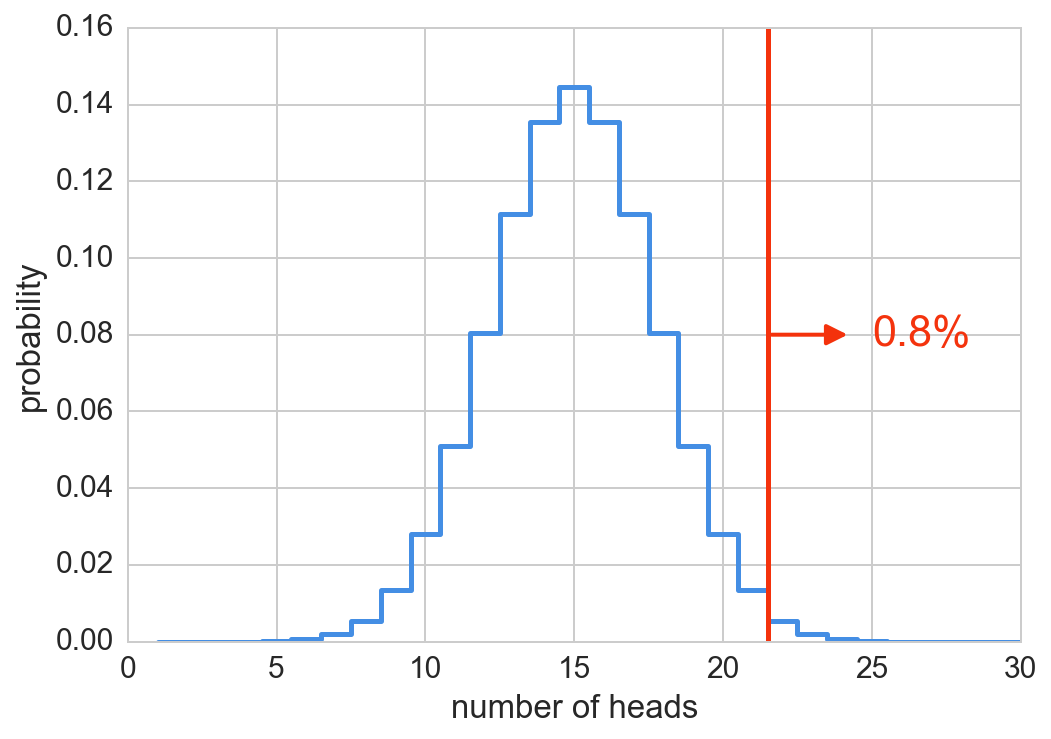

In [3]:
probabilities = [binom_prob(30, k, 0.5) for k in range(1, 31)]

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

plt.step(range(1, 31), probabilities, where='mid', color=blue)
plt.xlabel('number of heads')
plt.ylabel('probability')
plt.plot((21.5, 21.5), (0, 0.1599), color=red);
plt.annotate('0.8%', 
             xytext=(25, 0.08), 
             xy=(21.5, 0.08), 
             multialignment='right',
             va='center',
             color=red,
             size='large',
             arrowprops={'arrowstyle': '<|-', 
                         'lw': 2, 
                         'color': red, 
                         'shrinkA': 10});

#### What's a p-value?

A p-value is simply the sum of the probabilities of getting a specific result or more extreme. So, in our example above, the probability of getting 22 heads when flipping a coin 30 times is roughly 0.5%. The p-value however is the probability of seeing a result equal to the one we are df_aing or more extreme, so we will need to add the probabilities of for getting 22 heads, 23 heads, 24 heads, and so on and the function below does that for us. Running the code should give us a number close to 0.8%.

In [4]:
def p_value(n, k, p):
    """Returns the p-value for the given the given set 
    """
    return sum(binom_prob(n, i, p) for i in range(k, n+1))

print(p_value(30, 22, 0.5))

0.008062400855123997



### The Easier Method

The easier method for a hacker is just to simulate the whole thing. 

The python code below runs `n` simulations and calculates the proportion of simulations that resulted in at least 22 heads or more. The result should be something close to p-value we calculated above.

In [5]:
M = 0
n = 50000
for i in range(n):
    trials = np.random.randint(2, size=30)
    if (trials.sum() >= 22):
        M += 1
p = M / n

print(p)

0.00824


## Four Recipes for Hacking Statistics

1. [Direct Simulation](#Warm-up)
2. [Shuffling](#Shuffling)
3. [Bootstrapping](#Bootstrapping)
4. [Cross Validation](#Cross-Validation)

We've just seen the Direct Simulation recipe in the [warm up](#Warm-up) example above. The next example uses the Shuffling method to figure out if there's a statistically significant difference between two different populations. 

### Shuffling

In this example, we look at the Dr. Seuss story about the Star-Belly Sneetches. In this Seussian world, a group of creatures called the Sneetches are divided into two groups: those with stars on their bellies, and those without. Over time, the star-bellied sneetches have come to think of themselves as better than the non-starred sneetches. As researchers of sneetches, it's our job to uncover whether or not star-bellied sneetches really are better than their non-starred cousins.

The first step will be to create our experimental data. In the following code snippet we create a dataframe object that contains a set of df_a scores for both starred and unstarred sneetches. 

In [51]:
import pandas as pd

df = pd.DataFrame({'star': [1]*8 + 
                           [0]*12,
                   'score': [84, 72, 57, 46, 63, 76, 99, 91] +
                            [81, 69, 74, 61, 56, 87, 69, 65, 
                             66, 44, 62, 69]})
df

,score,star
0,84,1
1,72,1
2,57,1
3,46,1
4,63,1
5,76,1
6,99,1
7,91,1
8,81,0
9,69,0


If we then take a look at the average scores for each group of sneetches, we see that there's a difference in scores of 6.6 between the two groups. So, on average, the star-bellied sneetches did perform better on their df_as than the unstarred sneetches did, but the real question is, is this a significant difference?

In [52]:
starred_mean = df[df.star == 1].score.mean()
unstarred_mean = df[df.star == 0].score.mean()

print("Starred Sneetches Mean: %2.1f" % starred_mean)
print("Unstarred Sneetches Mean: %2.1f" % unstarred_mean)
print("Difference: %2.1f" % (starred_mean - unstarred_mean))

Starred Sneetches Mean: 73.5
Unstarred Sneetches Mean: 66.9
Difference: 6.6


To determine if this is a signficant difference, we could perform a t-df_a on our data to compute a p-value, and then just make sure that the p-value is less than the target 0.05. Or, we could use simulation instead. Unlike our first example, however, we don't have a generative function that we can use to create several different distributions. So then, how can we use simulation to solve our problem?

Well, we can run a bunch of simulations where we randomly **shuffle** the labels (i.e., starred or unstarred) of each sneetch, recompute the difference between the means, and then determine if the proportion of simulations in which the difference was at least as extreme as 6.6 was less than the target 5%. If so, we can conclude that the difference we see is, in fact, one that doesn't occur strictly by chance very often and so the difference is a significant one. If the proportion of simulations that have a difference of 6.6 or greater is more than 5%, we can conclude that the labels really do matter, and so we can conclude that star-bellied sneetches are "better" than their unstarred counterparts.

In [53]:
df['label'] = df['star']

num_simulations = 10000

differences = []
for i in range(num_simulations):
    np.random.shuffle(df['label'])
    starred_mean = df[df.label == 1].score.mean()
    unstarred_mean = df[df.label == 0].score.mean()
    differences.append(starred_mean - unstarred_mean)

Now that we've ran our simulations, we can calculate our p-value, which is simply the proportion of simulations that resulted in a difference greater than or equal to 6.6.

$$
p = \frac{N_{>6.6}}{N_{total}} = \frac{1528}{10000} = 0.15
$$

In [54]:
p_value = sum(diff >= 6.6 for diff in differences) / num_simulations
print("p-value: %2.2f" % p_value)

p-value: 0.16


Since our p-value is greater than 0.05, we can conclude that the difference in df_a scores between the two groups is not a significant one. In other words, if having a star on your belly actually mattered, we wouldn't expect to see as many simulations result in a difference at least as extreme as the one in the real sample population. 

The following code plots the distribution of the differences we found by running the simulations above along with a marker for the difference in our sample population.

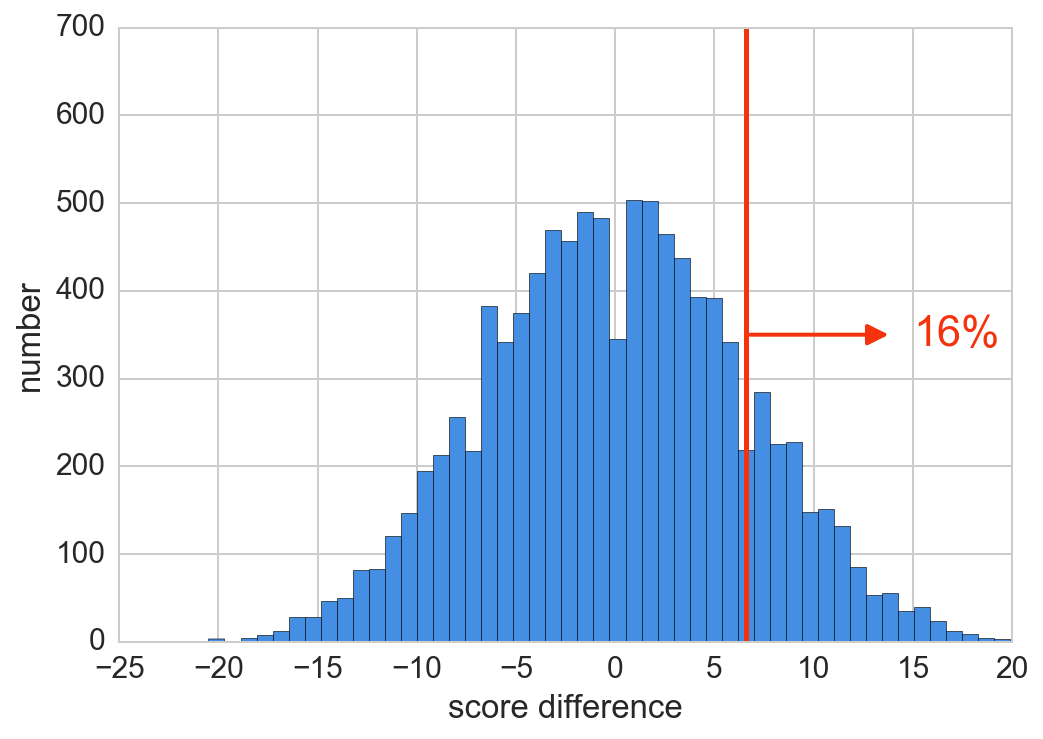

In [55]:
plt.hist(differences, bins=50, color=blue)
plt.xlabel('score difference')
plt.ylabel('number')
plt.plot((6.6, 6.6), (0, 700), color=red);
plt.annotate('%2.f%%' % (p_value * 100), 
             xytext=(15, 350), 
             xy=(6.6, 350), 
             multialignment='right',
             va='center',
             color=red,
             size='large',
             arrowprops={'arrowstyle': '<|-', 
                         'lw': 2, 
                         'color': red, 
                         'shrinkA': 10});

For further discussion on this method of simulation, check out John Rauser's keynote talk ["Statistics Without the Agonizing Pain"][rauser] from Strata + Hadoop 2014.

[rauser]: https://youtu.be/5Dnw46eC-0o

### Bootstrapping

In this example, we'll be using the story of Yertle the Turtle to explore the bootstrapping recipe. As the story goes, in the land of Sala-ma-Sond, Yertle the Turtle was the king of the pond and he wanted to be the most powerful, highest turtle in the land. So, he would stack turtles as high as he could to stand on their backs. As observers of this behavior, we've recorded the heights of 20 of Yertle's turtle towers and we've placed them in a dataframe in the following bit of code.

In [14]:
df = pd.DataFrame({'heights': [48, 24, 51, 12, 21, 
                               41, 25, 23, 32, 61, 
                               19, 24, 29, 21, 23, 
                               13, 32, 18, 42, 18]})

The questions we want to answer in this example are: what is the mean height of Yertle's turtle stacks, and what is the uncertainty of this estimate?

#### The Classic Method

The classic method is just to calculate the sample mean...

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i = 28.9
$$

...and the standard error of the mean.

$$
\sigma_{\bar{x}} = \frac{1}{
    \sqrt{N}}\sqrt{\frac{1}{N - 1}
    \sum_{i=1}^{N} (x_i - \bar{x})^2
} = 3.0
$$

But, being hackers, we'll be using simulation once again.

Just like in our last example, we are once again faced with the problem of not having a generative model, but unlike the last example, we're not comparing two groups, so we can't just shuffle around labels here, instead we'll use something called bootstrap resampling.

Bootstrap resampling is a method that simulates several random sample distributions by drawing samples from the current distribution with replacement, in other words, we can draw the same data point more than once. Luckily, pandas makes this super easy with its `sample` function.

In [15]:
sample = df.sample(20, replace=True)
print("Mean: %2.2f" % sample.heights.mean())
sample

Mean: 30.05


,heights
5,41
17,18
19,18
7,23
14,23
0,48
13,21
2,51
19,18
5,41


Now, we can just do this several thousand times and take a look at the mean and standard deviation of the results and we should have something that very closely approximates the answers from the classic method above.

In [16]:
xbar = []
for i in range(10000):
    sample = df.sample(20, replace=True)
    xbar.append(sample.heights.mean())
    

print("Mean: %2.1f, Standard Error: %2.1f" % (np.mean(xbar), 
                                              np.std(xbar)))

Mean: 28.9, Standard Error: 2.9


### Cross Validation

For this example, we dive into the world of the Lorax. In the story of the Lorax, a faceless creature sales an item that all people need called a Thneed. Our job as consultants to Onceler Industries is to project Thneed sales. To get started forecasting Thneed sales, we'll first need some data. 

The data in the cell below was "eyeballed" from Jake's slide. So, it may not be exactly the same, but it should be close enough for our example analyis.

In [17]:
df = pd.DataFrame({
    'temp': [22, 36, 36, 38, 44, 45, 47,
             43, 44, 45, 47, 49,
             52, 53, 53, 53, 54, 55, 55, 55, 56, 57, 58, 59,
             60, 61, 61.5, 61.7, 61.7, 61.7, 61.8, 62, 62, 63.4, 64.6,
             65, 65.6, 65.6, 66.4, 66.9, 67, 67, 67.4, 67.5, 68, 69, 
             70, 71, 71, 71.5, 72, 72, 72, 72.7, 73, 73, 73, 73.3, 74, 75, 75, 
             77, 77, 77, 77.4, 77.9, 78, 78, 79,
             80, 82, 83, 84, 85, 85, 86, 87, 88,
             90, 90, 91, 93, 95, 97,
             102, 104],
    'sales': [660, 433, 475, 492, 302, 345, 337,
              479, 456, 440, 423, 269,
              331, 197, 283, 351, 470, 252, 278, 350, 253, 253, 343, 280,
              200, 194, 188, 171, 204, 266, 275, 171, 282, 218, 226, 
              187, 184, 192, 167, 136, 149, 168, 218, 298, 199, 268,
              235, 157, 196, 203, 148, 157, 213, 173, 145, 184, 226, 204, 250, 102, 176,
              97, 138, 226, 35, 190, 221, 95, 211,
              110, 150, 152, 37, 76, 56, 51, 27, 82,
              100, 123, 145, 51, 156, 99,
              147, 54]
})

Now that we have our sales data in a pandas dataframe, we can take a look at it to see if any trends show up. Plotting the data in a scatterplot, like the one below, reveals that a relationship does in fact exist between temprature and Thneed sales.

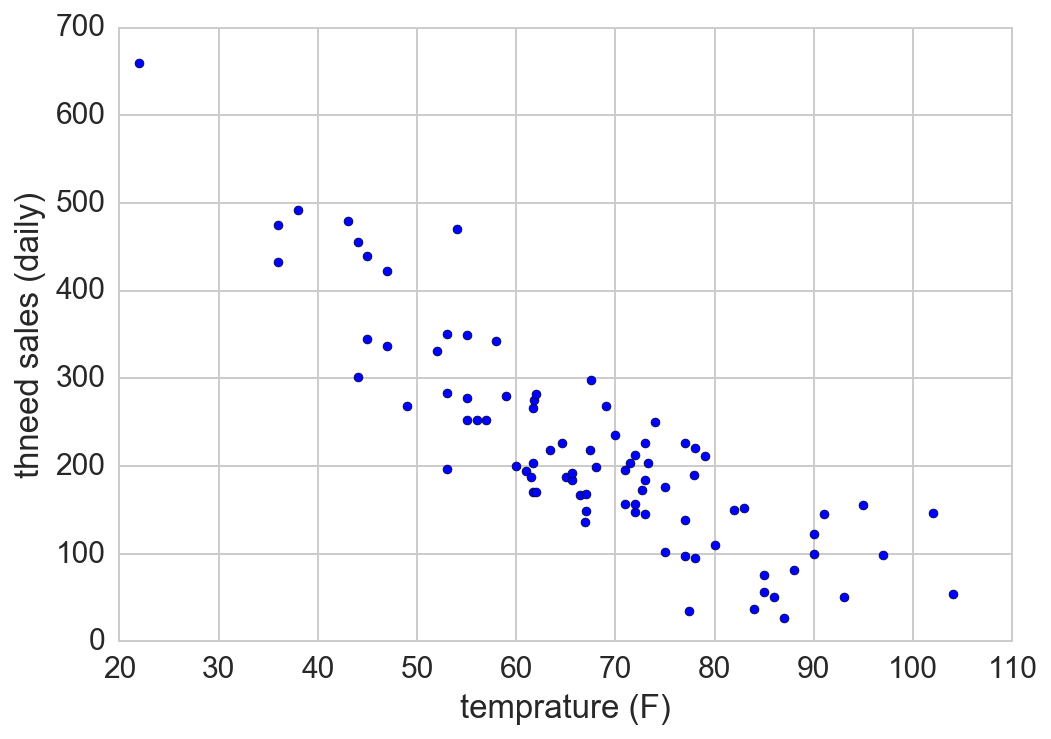

In [29]:
# Grab a reference to fig and axes object so we can reuse them
fig, ax = plt.subplots()

# Plot the Thneed sales data
ax.scatter(df.temp, df.sales)
ax.set_xlim(xmin=20, xmax=110)
ax.set_ylim(ymin=0, ymax=700)
ax.set_xlabel('temprature (F)')
ax.set_ylabel('thneed sales (daily)');

We can see a definite relationship between the two variables temperature and sales, but how can we best model that relationship so we can accurately predict sales based on temperature? 

Well, one measure of a model's accuracy is the [Root-Mean-Square Error (RMSE)][rmse]. This metric represents the sample standard deviation between a set of predicted values from a model and the actual observed values. We can use RMSE to measure how well our model's accurately represent the Thneed sales dataset.

In the next cell, we'll create two different models and see which one does a better job of fitting our sales data.

[rmse]: https://en.wikipedia.org/wiki/Root-mean-square_deviation

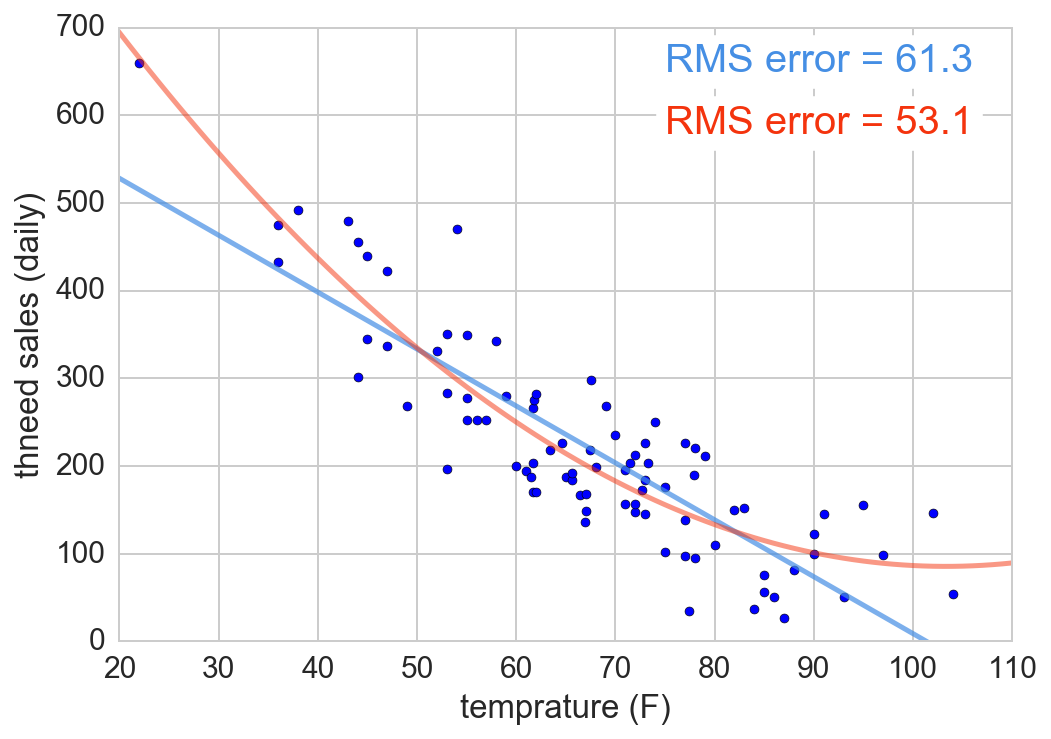

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

# 1D Polynomial Fit
d1_model = np.poly1d(np.polyfit(df.temp, df.sales, 1))
d1_predictions = d1_model(range(111))
ax.plot(range(111), d1_predictions, 
        color=blue, alpha=0.7)

# 2D Polynomial Fit
d2_model = np.poly1d(np.polyfit(df.temp, df.sales, 2))
d2_predictions = d2_model(range(111))
ax.plot(range(111), d2_predictions, 
        color=red, alpha=0.5)

ax.annotate('RMS error = %2.1f' % rmse(d1_model(df.temp), df.sales),
             xy=(75, 650),
             fontsize=20,
             color=blue,
             backgroundcolor='w')

ax.annotate('RMS error = %2.1f' % rmse(d2_model(df.temp), df.sales),
             xy=(75, 580),
             fontsize=20,
             color=red,
             backgroundcolor='w')

display(fig);

In the figure above, we plotted two separate models. The first model in blue is a simple linear model, in other words, we fit a first-degree polynomial to our data. The second model in red is a second-degree polynomial. We can see from the RMSE values above that the second-degree polynomial performed better than a simple linear model, but is this the best possible model that we can find?

Let's take a look at the RMSE of a few more models to see if we can do better.

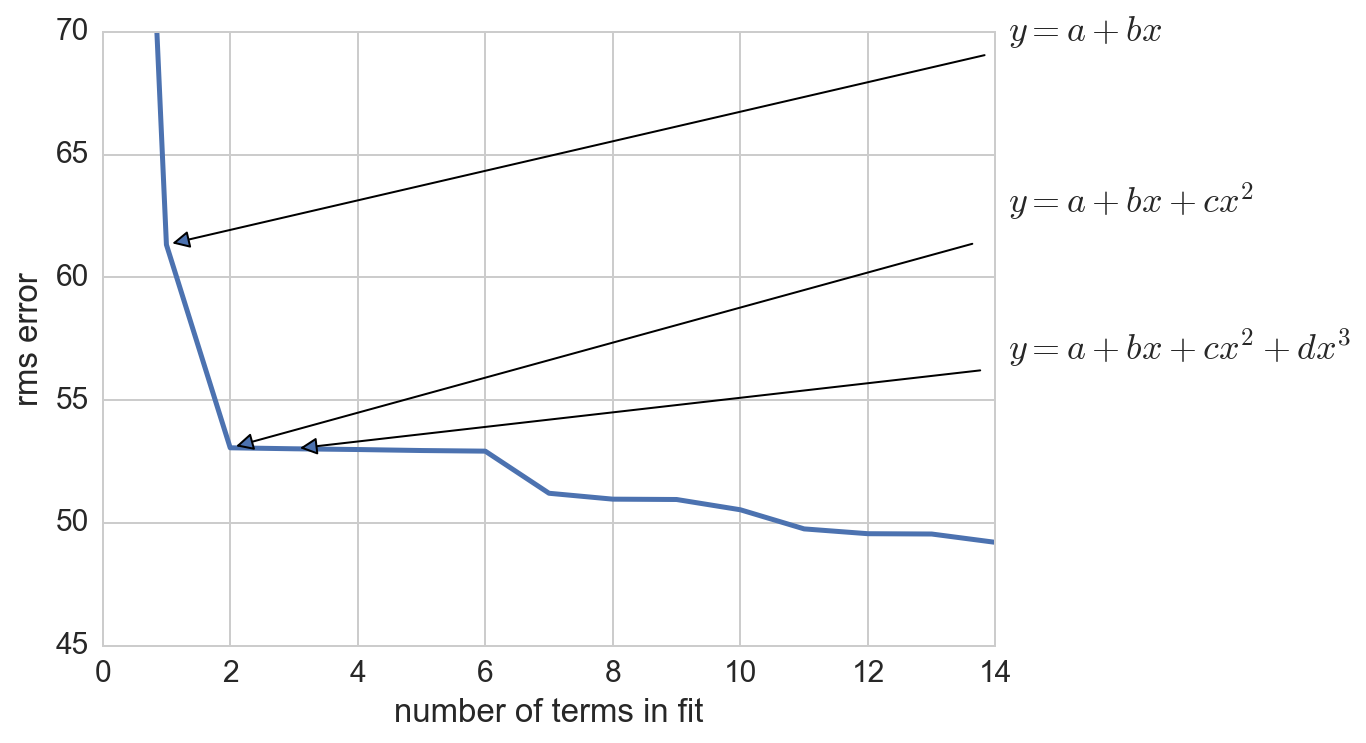

In [22]:
rmses = []
for deg in range(15):
    model = np.poly1d(np.polyfit(df.temp, df.sales, deg))
    predictions = model(df.temp)
    rmses.append(rmse(predictions, df.sales))
    
plt.plot(range(15), rmses)
plt.ylim(45, 70)
plt.xlabel('number of terms in fit')
plt.ylabel('rms error')

plt.annotate('$y = a + bx$', 
             xytext=(14.2, 70), 
             xy=(1, rmses[1]), 
             multialignment='right',
             va='center',
             arrowprops={'arrowstyle': '-|>',
                         'lw': 1,
                         'shrinkA': 10,
                         'shrinkB': 3})

plt.annotate('$y = a + bx + cx^2$', 
             xytext=(14.2, 64), 
             xy=(2, rmses[2]), 
             multialignment='right',
             va='top',
             arrowprops={'arrowstyle': '-|>',
                         'lw': 1,
                         'shrinkA': 35,
                         'shrinkB': 3})


plt.annotate('$y = a + bx + cx^2 + dx^3$', 
             xytext=(14.2, 58), 
             xy=(3, rmses[3]), 
             multialignment='right',
             va='top',
             arrowprops={'arrowstyle': '-|>',
                         'lw': 1,
                         'shrinkA': 12,
                         'shrinkB': 3});

We can see, from the plot above, that as we increase the number of terms (i.e., the degrees of freedom) in our model we decrease the RMSE, and this behavior can continue indefinitely, or until you have as many terms as you do data points, at which time you're fitting the data perfectly.

The problem with this approach though, is that as we increase the number of terms in our equation, we simply match the given dataset closer and closer, but what if we see a datapoint that's not in our dataset?

As you can see in the plot below, the model that we've created, though it has a very low RMSE, it has so many terms that it matches our current dataset too closely.

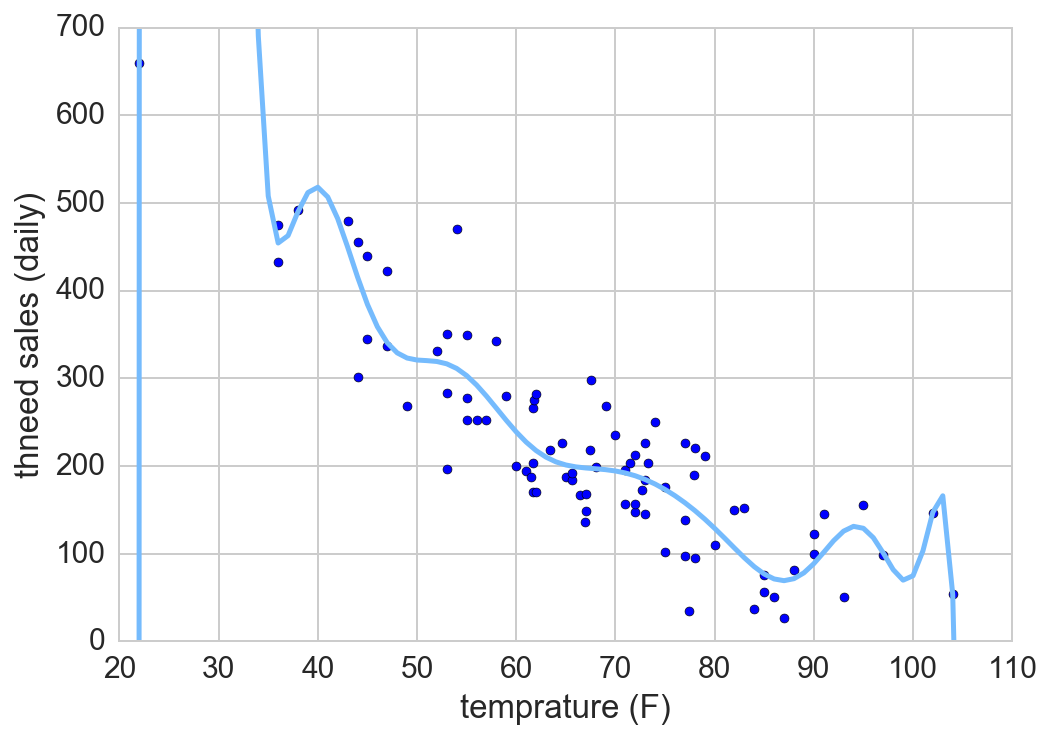

In [23]:
# Remove everything but the datapoints
ax.lines.clear()
ax.texts.clear()

# 14 Dimensional Model
model = np.poly1d(np.polyfit(df.temp, df.sales, 14))
ax.plot(range(20, 110), model(range(20, 110)),
         color=sns.xkcd_rgb['sky blue'])

display(fig)

This phenomenon of too closely modelling the training dataset is well known amongst machine learning practitioners as [overfitting][overfitting] and one way that we can avoid it is to use [cross-validation][cv]. 

Cross-validation avoids overfitting by splitting the training dataset into several sub-datasets and using each one to train and test multiple models. Then the RMSE's of each of those models is averaged to give a more likely estimate of how a model of that type  would perform on unseen data.

So, let's give it a try by splitting our data into two groups and randomly assigning datapoints into each one using the `numpy.random.rand` function.

[overfitting]: https://en.wikipedia.org/wiki/Overfitting
[cv]: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [24]:
df_a = df.sample(n=len(df)/2)
df_b = df.drop(df_a.index)

Then, we can take a look at each subset of our data by plotting each one as a different color.

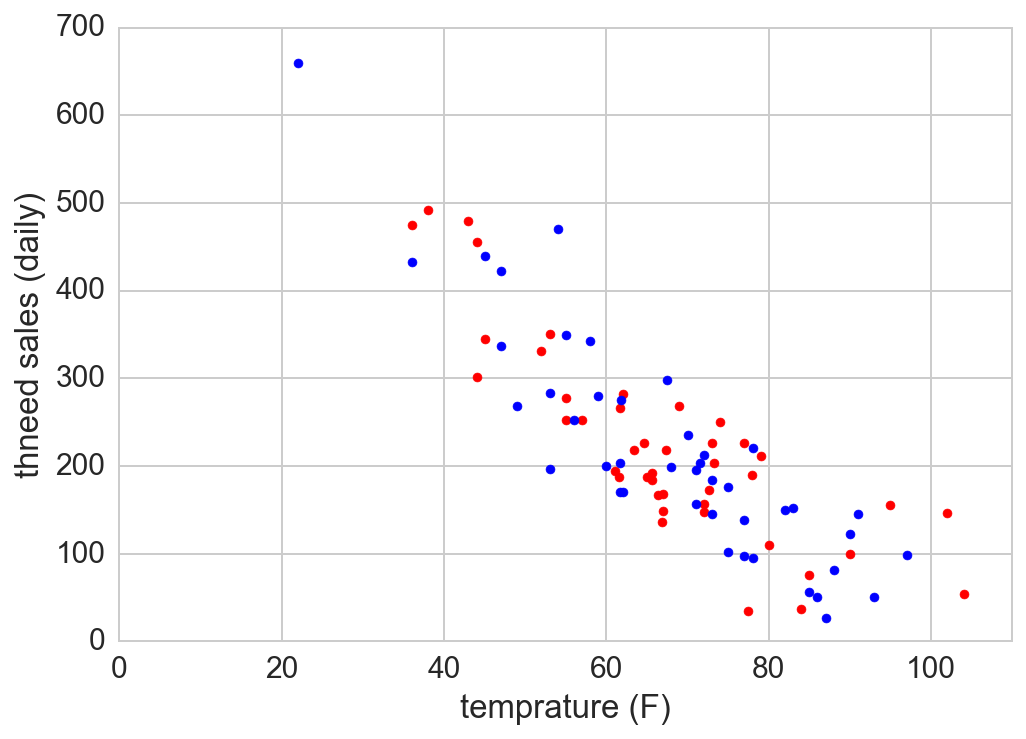

In [25]:
plt.scatter(df_a.temp, df_a.sales, color='red')
plt.scatter(df_b.temp, df_b.sales, color='blue')
plt.xlim(0, 110)
plt.ylim(0, 700)
plt.xlabel('temprature (F)')
plt.ylabel('thneed sales (daily)');

Next, we'll find the best model for each subset of data. In this particular example, we'll fit a second-degree polynomial to each subset and plot both below.

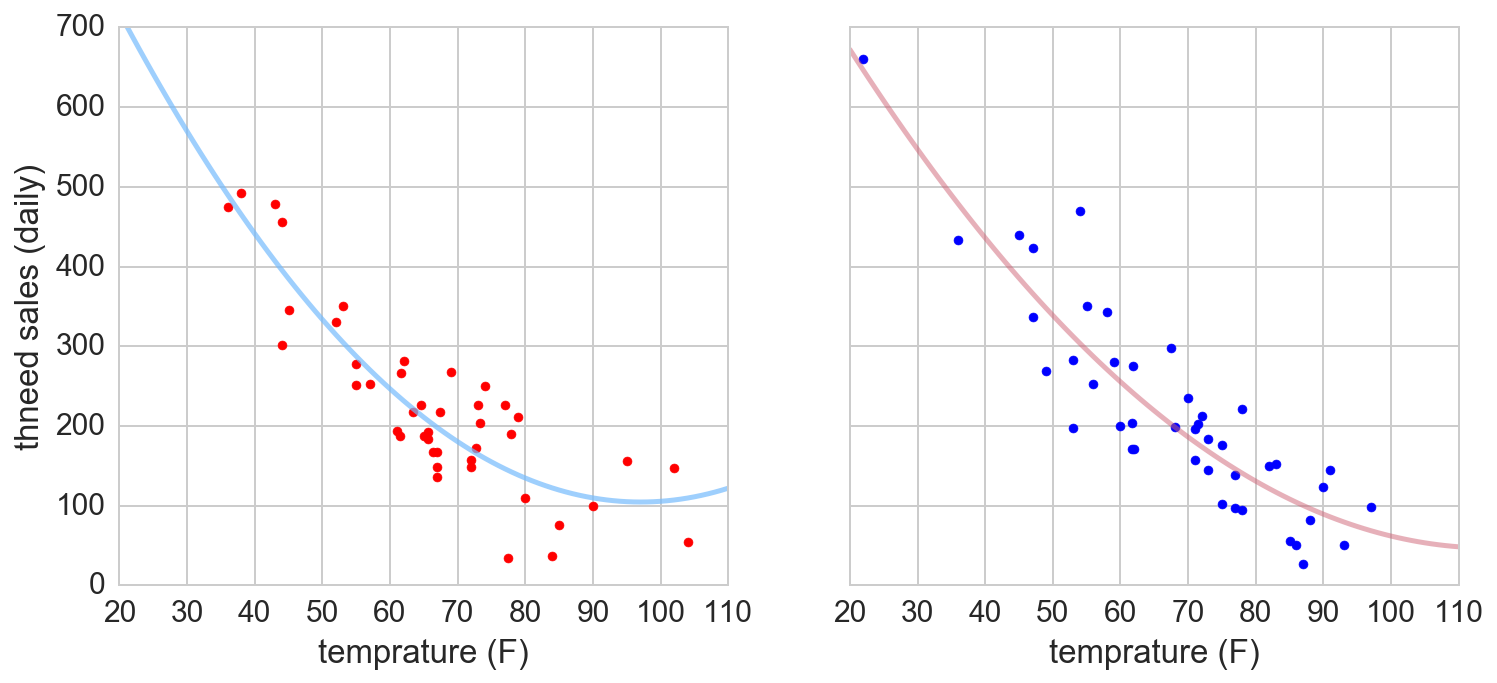

In [26]:
m1 = np.poly1d(np.polyfit(df_a.temp, df_a.sales, 2))
m2 = np.poly1d(np.polyfit(df_b.temp, df_b.sales, 2))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               sharex=False, sharey=True,
                               figsize=(12, 5))

x_min, x_max = 20, 110
y_min, y_max = 0, 700
x = range(x_min, x_max + 1)

# Plot the df_a group
ax1.scatter(df_a.temp, df_a.sales, color='red')
ax1.set_xlim(xmin=x_min, xmax=x_max)
ax1.set_ylim(ymin=y_min, ymax=y_max)
ax1.set_xlabel('temprature (F)')
ax1.set_ylabel('thneed sales (daily)')
ax1.plot(x, m1(x),
         color=sns.xkcd_rgb['sky blue'],
         alpha=0.7)

# Plot the df_b group
ax2.scatter(df_b.temp, df_b.sales, color='blue')
ax2.set_xlim(xmin=x_min, xmax=x_max)
ax2.set_ylim(ymin=y_min, ymax=y_max)
ax2.set_xlabel('temprature (F)')
ax2.plot(x, m2(x),
         color=sns.xkcd_rgb['rose'], 
         alpha=0.5);

Finally, we'll compare models across subsets by calculating the RMSE for each model using the training set for the other model. This will give us two RMSE scores which we'll then average to get a more accurate estimate of how well a second-degree polynomial will perform on any unseen data.

In [27]:
print("RMS = %2.1f" % rmse(m1(df_a.temp), df_a.sales))
print("RMS = %2.1f" % rmse(m2(df_b.temp), df_b.sales))
print("RMS estimate = %2.1f" % np.mean([rmse(m1(df_a.temp), df_a.sales),
                                        rmse(m2(df_b.temp), df_b.sales)]))

RMS = 49.8
RMS = 55.4
RMS estimate = 52.6


Then, we simply repeat this process for as long as we want. 

The following code repeats the process described above for polynomials up to 14 degrees and plots the average RMSE for each one against the non-cross-validated RMSE's that we calculated earlier.

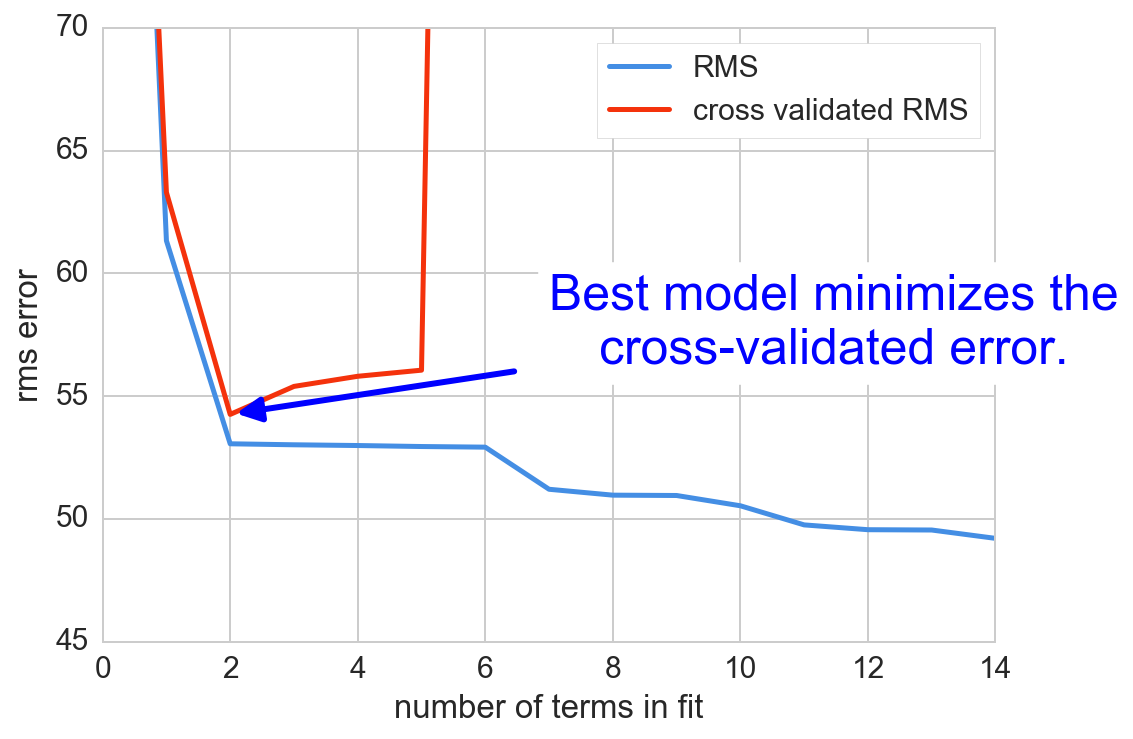

In [50]:
rmses = []
cross_validated_rmses = []
for deg in range(15):
    # df_a the model on the whole dataset and calculate its
    # RMSE on the same set of data
    model = np.poly1d(np.polyfit(df.temp, df.sales, deg))
    predictions = model(df.temp)
    rmses.append(rmse(predictions, df.sales))
    
    # Use cross-validation to create the model and df_a it
    m1 = np.poly1d(np.polyfit(df_a.temp, df_a.sales, deg))
    m2 = np.poly1d(np.polyfit(df_b.temp, df_b.sales, deg))
    
    p1 = m1(df_b.temp)
    p2 = m2(df_a.temp)
    
    cross_validated_rmses.append(np.mean([rmse(p1, df_b.sales), 
                                          rmse(p2, df_a.sales)]))

    
plt.plot(range(15), rmses, color=blue, 
         label='RMS')
plt.plot(range(15), cross_validated_rmses, color=red, 
         label='cross validated RMS')
plt.ylim(45, 70)
plt.xlabel('number of terms in fit')
plt.ylabel('rms error')
plt.legend(frameon=True)

plt.annotate('Best model minimizes the\ncross-validated error.', 
             xytext=(7, 60), 
             xy=(2, cross_validated_rmses[2]), 
             multialignment='center',
             va='top',
             color='blue',
             size=25,
             backgroundcolor='w',
             arrowprops={'arrowstyle': '-|>',
                         'lw': 3,
                         'shrinkA': 12,
                         'shrinkB': 3,
                         'color': 'blue'});

As you can see, going from a 1-degree to a 2-degree polynomial gives us quite a large improvement overall. But, unlike the RMSE that we calculated against the training set, when using cross-validation we can see that adding more degrees of freedom to our equation quickly reduces the effectiveness of the model against unseen data. This is overfitting in action! In fact, from the looks of the graph above, it would seem that a second-degree polynomial is actually our best bet for this particular dataset.

#### 2-Fold Cross-Validation

The type of cross-validation that we just performed above has a specific name; it's called a 2-fold cross-validation since we split our dataset into two subsets. This is one of a multitude of what are called *k*-fold cross-validation methods, where *k* stands for the number of subsets, and models, that are created to calculate our estimate RMSE. One slight difference between *k*-fold and 2-fold cross-validation, however, is that in *k*-fold, *k* equal sized subsamples are created and one is held as the test set for all of the models created on the other *k* - 1 subsamples. So, *k*-fold is done slightly differently than 2-fold cross-validation.

## Preliminaries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setup the look and feel of the notebook
sns.set_context("notebook", font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

# Suppress all warnings just to keep the notebook nice and clean
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display

/Users/croach/anaconda/envs/dsms/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
